In [12]:
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 25, 15


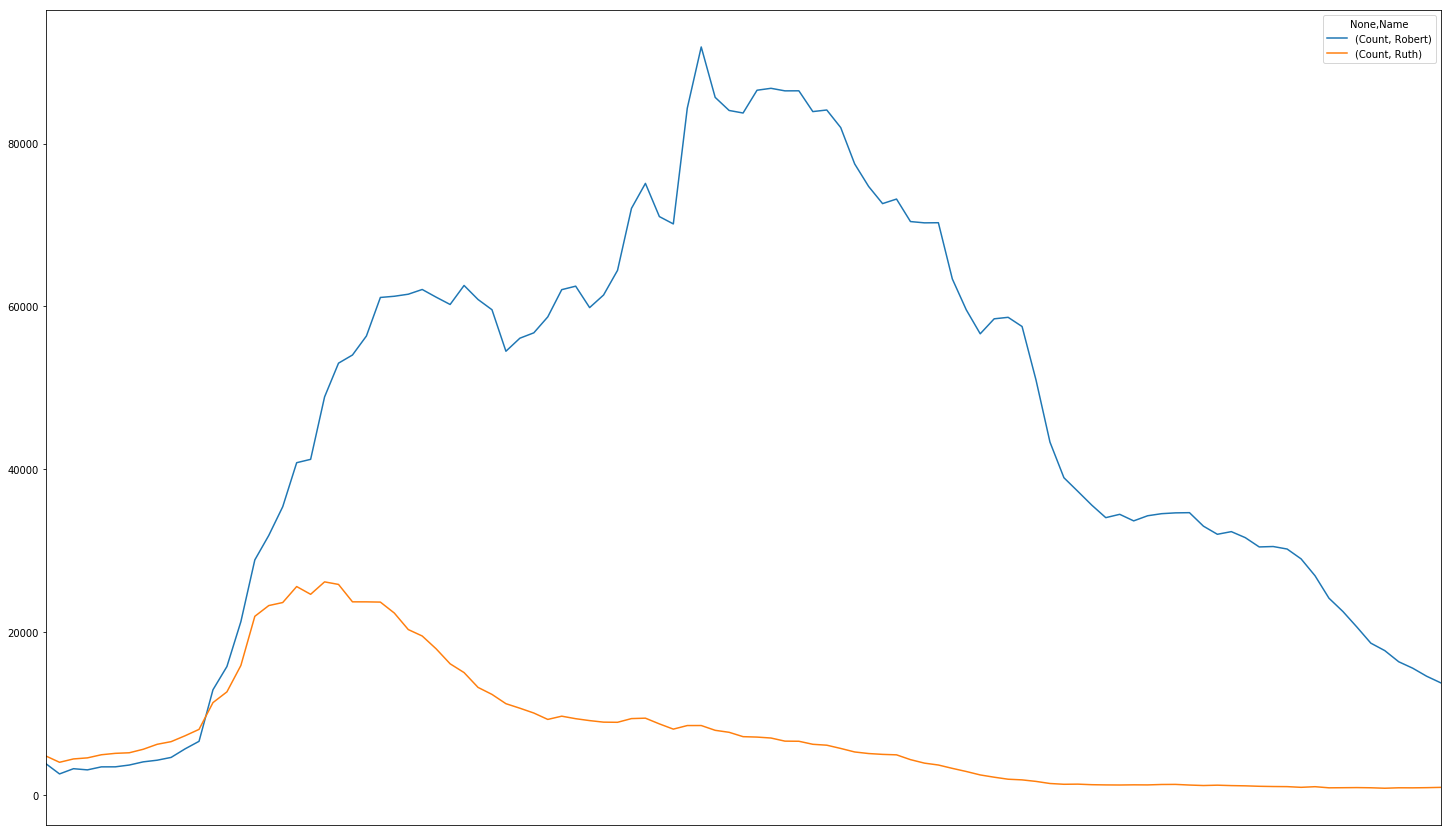

In [22]:
#  1-е и 2-е задание

names_years = {}
ticks_five_years = list()
ticks_one_year = list()
for year in range(1900, 2001):
    names_years[year] = pd.read_csv(f'names/yob{year}.txt',
                                   names=['Name', 'Gender', 'Count'])
    ticks_one_year.append(year)
    if year % 5 == 0:
        ticks_five_years.append(year)
all_years = pd.concat(names_years).reset_index(level=1, drop=True)
names_select = all_years[all_years.Name.isin(['Ruth', 'Robert'])]
names_all = names_select.groupby([names_select.index, 'Name']).sum()
names_all.unstack('Name').plot()
plt.xticks([])
plt.show()

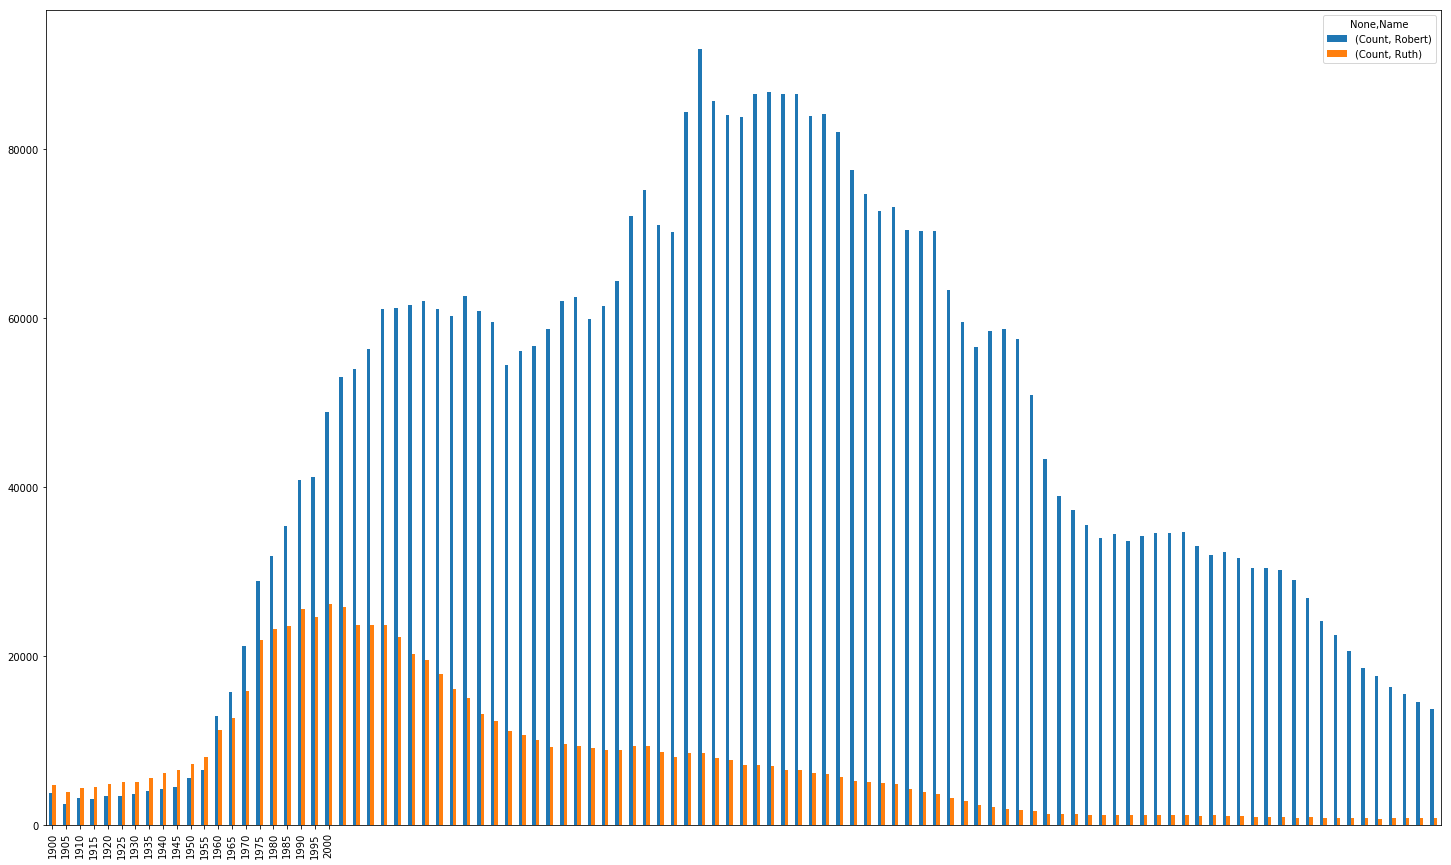

In [34]:
import numpy as np
n = 21
index = np.arange(n)
names_five = names_select.groupby([names_select.index, 'Name']).sum()
names_five.unstack().plot(kind='bar')
plt.xticks(index, ticks_five_years)
plt.show()

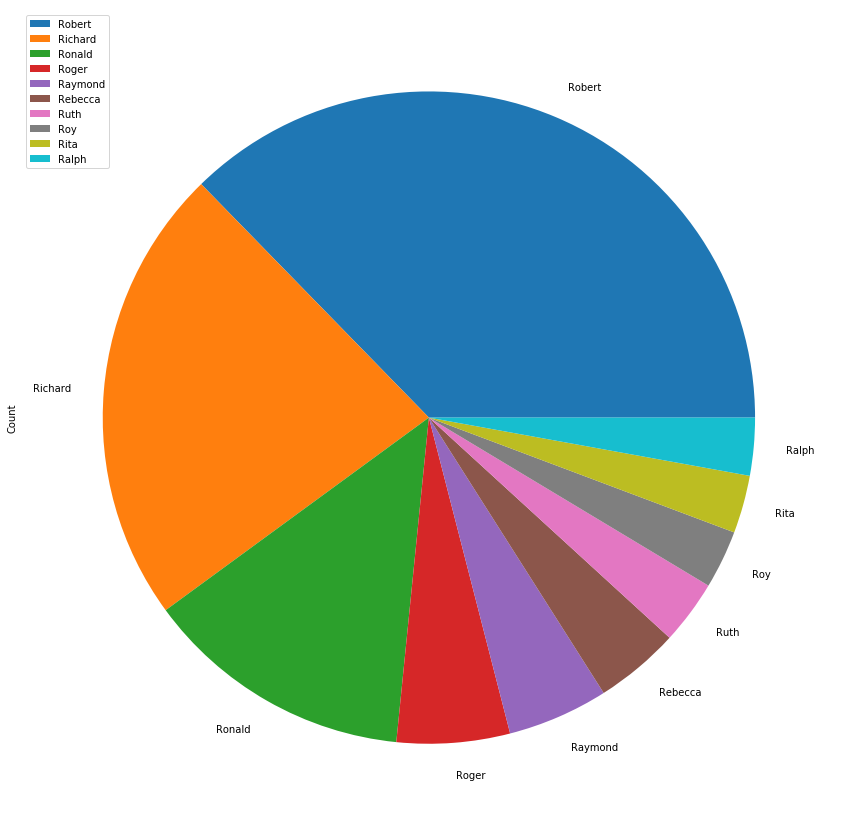

In [20]:
# 3-е задание

names = pd.read_csv(f'names/yob1950.txt',
                          names=['Name', 'Gender', 'Count'])
r_names = names[names.Name.str.slice(0, 1) == 'R'].groupby(['Name']).sum().sort_values('Count', ascending=False).head(10)
r_names.plot(kind='pie', y='Count', x='Name')
plt.show()

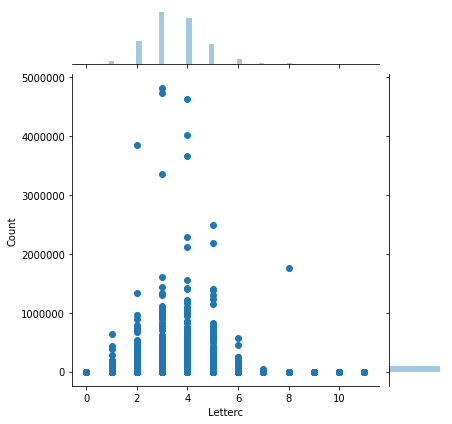

In [21]:
# 4-e задание, не очень понял, что от меня требуется в графике, не понимаю я пока точечные
import re
import seaborn as sns
group_years = all_years.groupby(['Name']).sum().reset_index()
group_years['Letterc'] = group_years.Name.apply(lambda x: len(re.findall('[QWRTPSDFGHJKLZXCVBNMqwrtpsdfghjklzxcbvnm]', x)))
sns.jointplot(x='Letterc', y='Count', data=group_years, kind='scatter')
plt.show()